## DS24MS03 - Aditya Rajshekhar Mahamuni

### Project - Concrete Strength
#### Problem Statement
* Predict the compressive strength of concrete using its composition and age.

### Importing libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

### Loading Dataset

In [6]:
df = pd.read_csv(r'C:\Users\adity\Downloads\concrete_Data.csv')

In [7]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### DATA PREPROCESSING

#### Handling Missing Values

In [10]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [11]:
# No missing values found

#### Handling duplicate values

In [13]:
df.duplicated().sum()

25

In [14]:
df = df.drop_duplicates()

#### Outlier treatment

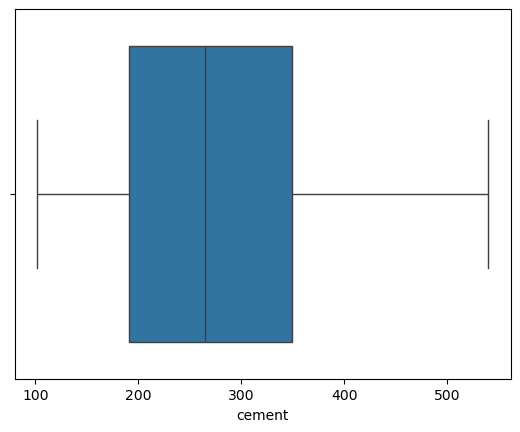

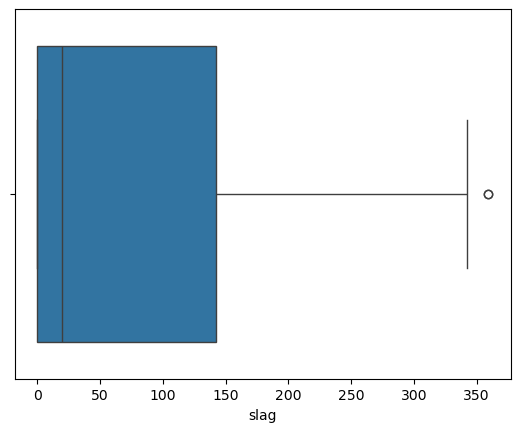

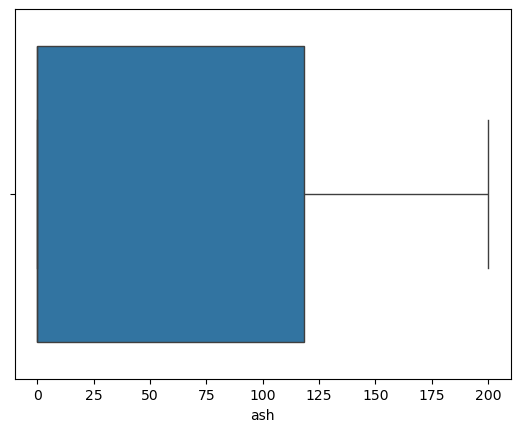

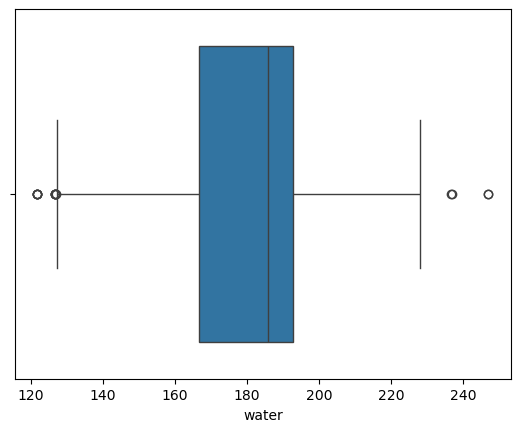

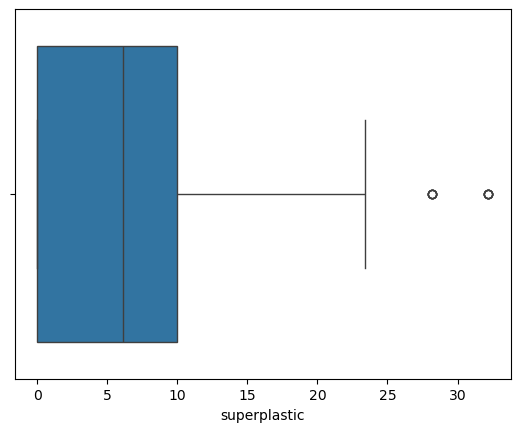

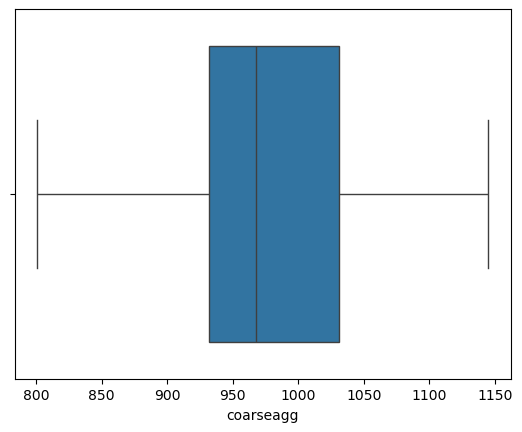

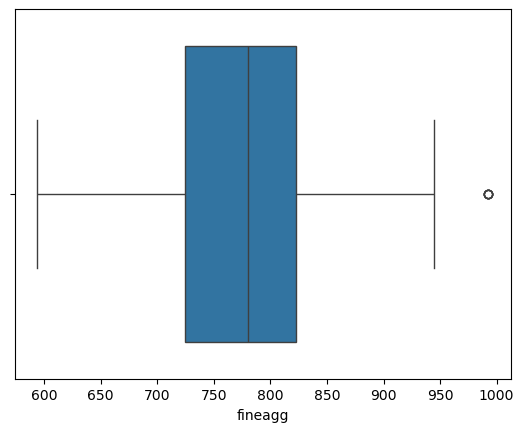

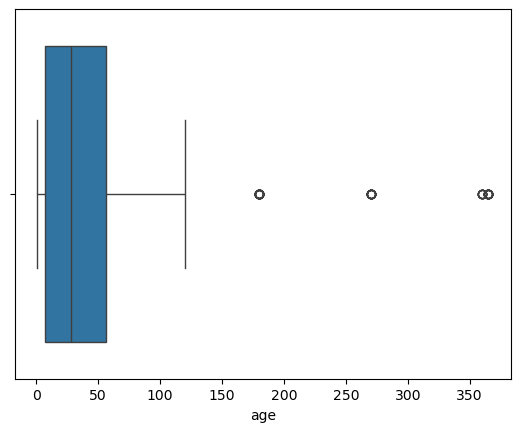

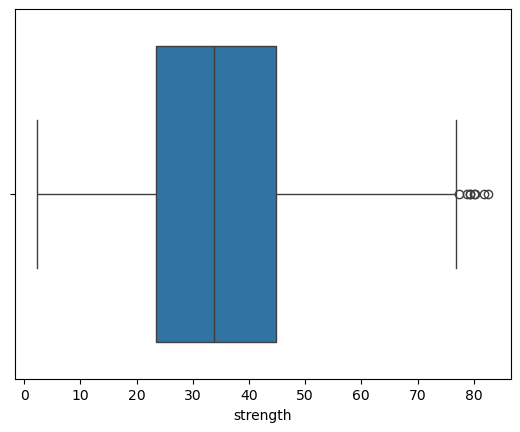

In [16]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

In [17]:
df.age.value_counts().sort_index(ascending=False)

age
365     14
360      6
270     13
180     26
120      3
100     52
91      17
90      54
56      86
28     419
14      62
7      122
3      129
1        2
Name: count, dtype: int64

In [18]:
df = df[df.age <= 130]

### EDA

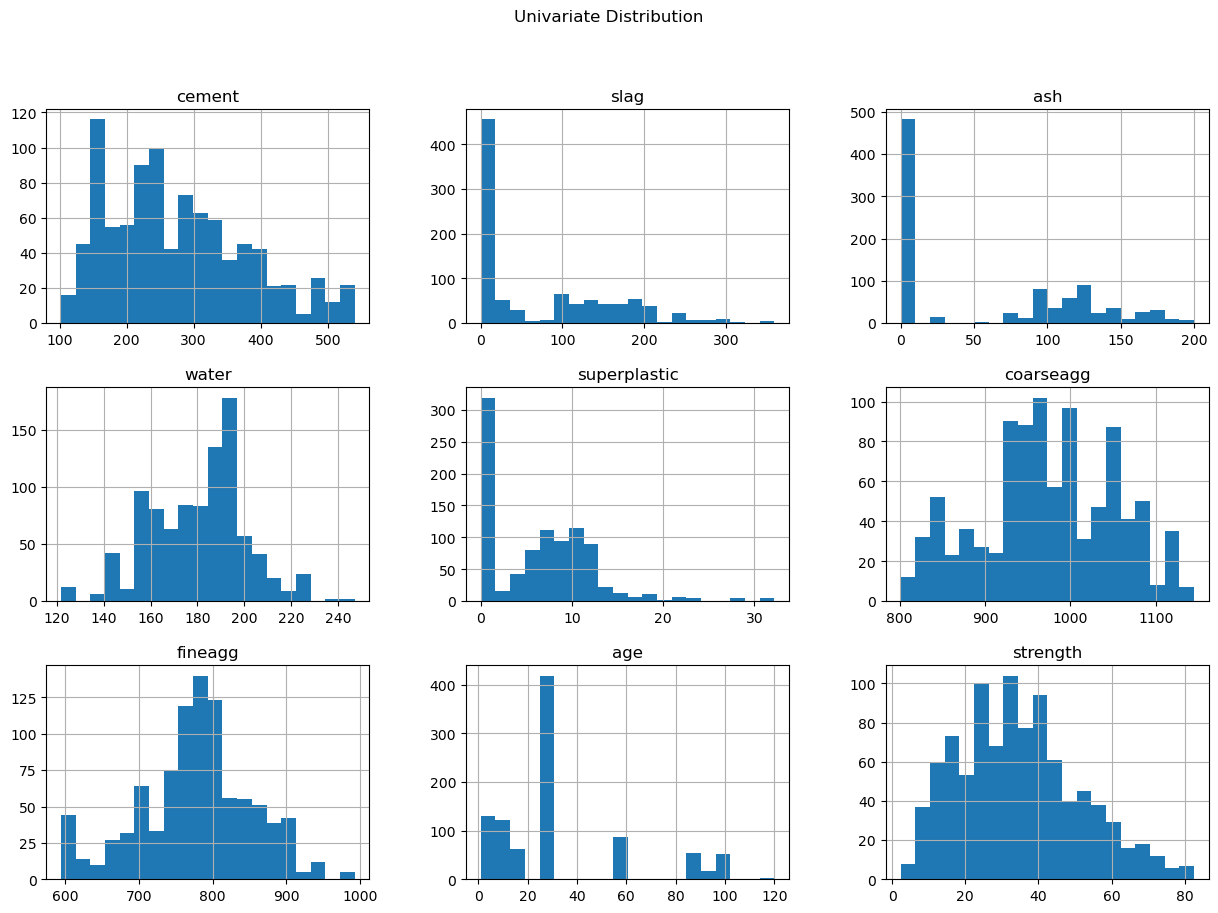

In [20]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Univariate Distribution")
plt.show()

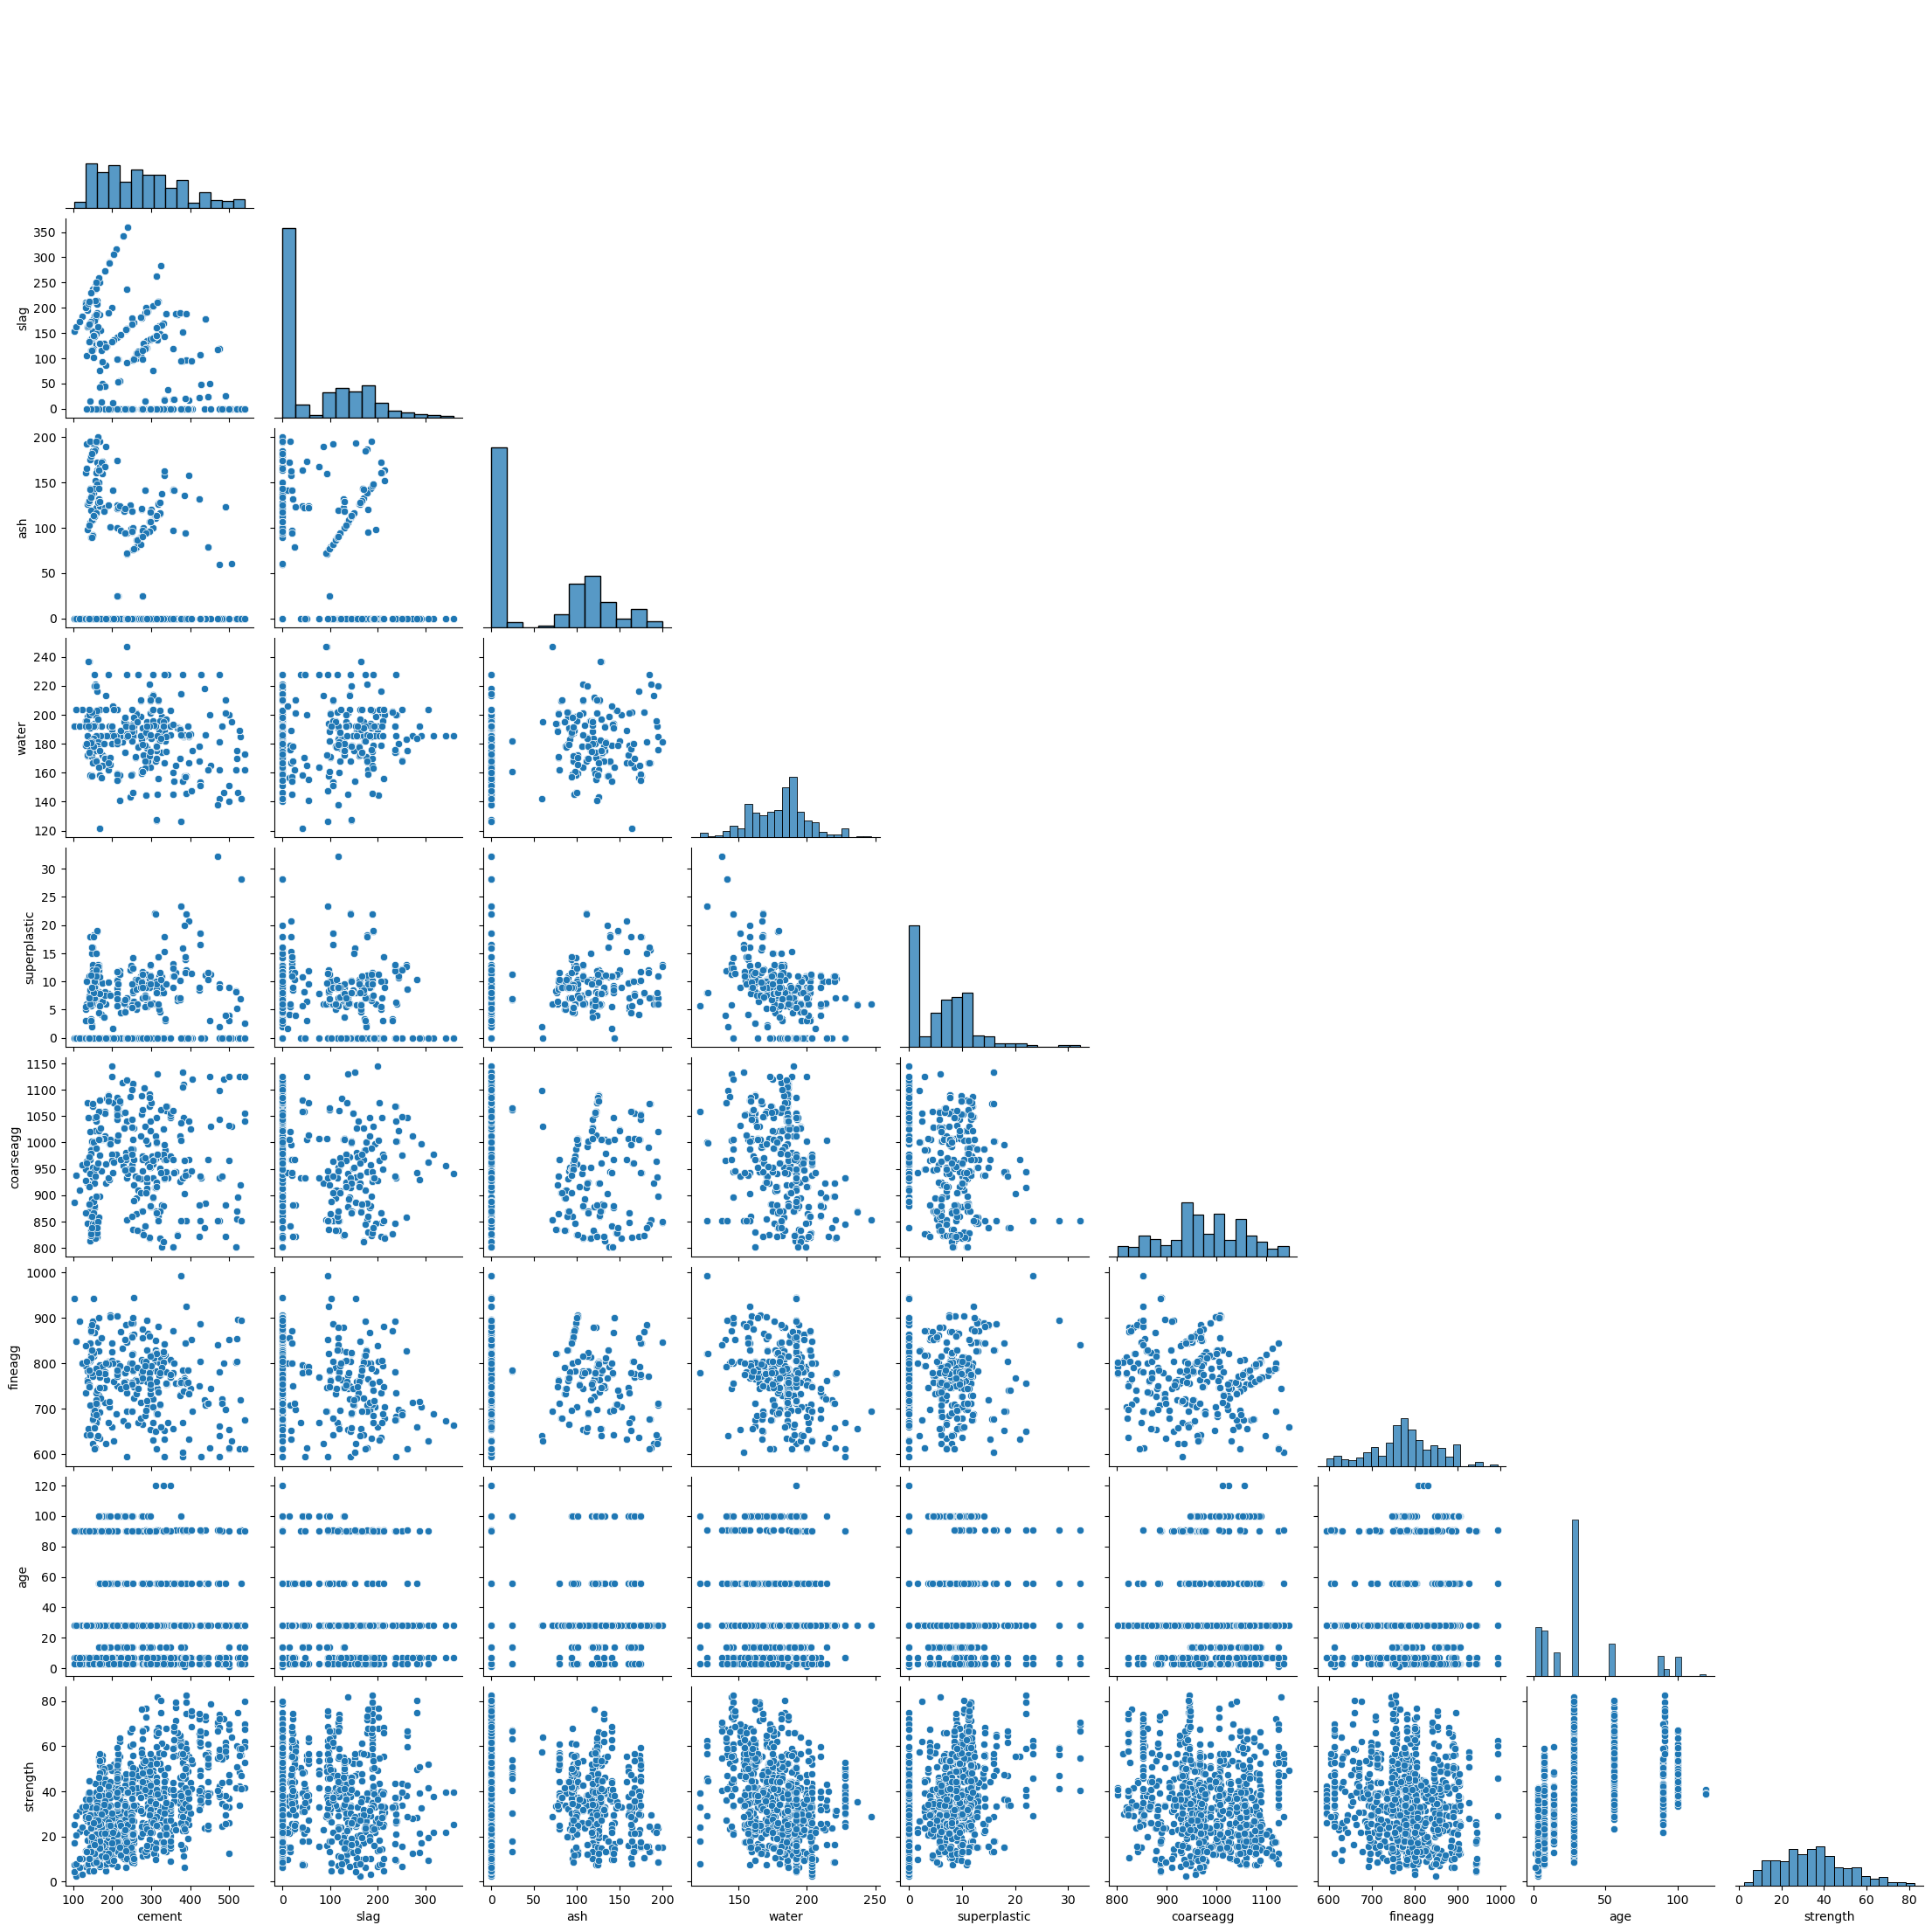

In [21]:
sns.pairplot(df, corner=True);

### Correlation heatmap

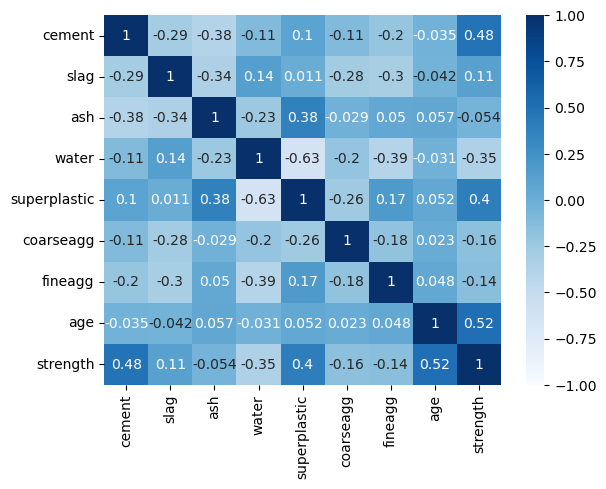

In [23]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, vmin=-1, vmax=1);

### Skewness and Kurtosis

In [25]:
df.skew().reset_index().rename(columns={'index': 'Feature', 0: 'Skewness'})

,Feature,Skewness
0,cement,0.592198
1,slag,0.843654
2,ash,0.396765
3,water,-0.071856
4,superplastic,0.927035
5,coarseagg,-0.115484
6,fineagg,-0.191462
7,age,1.248774
8,strength,0.450978


In [26]:
df.kurt().reset_index().rename(columns={'index': 'Feature', 0: 'Kurtosis'})

,Feature,Kurtosis
0,cement,-0.410529
1,slag,-0.422859
2,ash,-1.445023
3,water,0.252103
4,superplastic,1.724910
5,coarseagg,-0.647887
6,fineagg,0.038398
7,age,0.613421
8,strength,-0.282250


### Train-Test-Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(columns=['strength'])
y = df['strength']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

### Standardizing the data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
std = StandardScaler()

In [34]:
X_train_scaled = std.fit_transform(X_train)

In [35]:
X_test_scaled = std.transform(X_test)

### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [40]:
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - (r2_score(y_test, lr.predict(X_test_scaled)))) * (n - 1) / (n - p - 1)

print(f'Train R2: {lr.score(X_train_scaled, y_train)*100}')
print(f'Test R2: {lr.score(X_test_scaled, y_test)*100}')
print(f'Adj. R2 : {adj_r2*100}')

Train R2: 74.81720823496457
Test R2: 75.04437859217482
Adj. R2 : 73.94136770122121


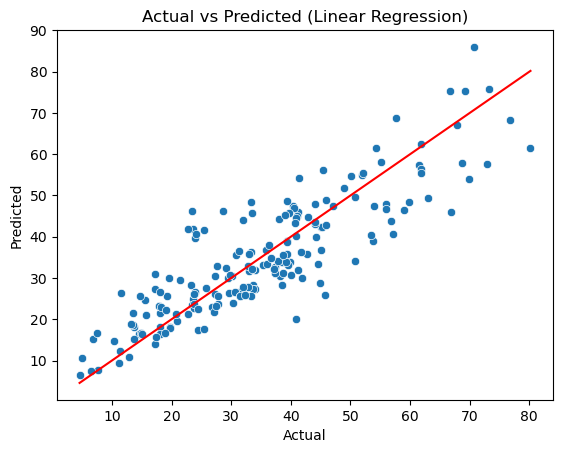

In [41]:
sns.scatterplot(x=y_test, y=lr.predict(X_test_scaled))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Linear Regression)')
plt.show()

In [42]:
diff = pd.DataFrame({'Actual': y_test,
             'Predicted': lr.predict(X_test_scaled),
             'Difference': y_test - (lr.predict(X_test_scaled))}).reset_index(drop = True)
diff.head()

,Actual,Predicted,Difference
0,61.86,62.438203,-0.578203
1,45.08,42.410601,2.669399
2,41.89,30.039899,11.850101
3,41.37,54.215928,-12.845928
4,23.89,39.783024,-15.893024


### SVR

In [78]:
from sklearn.svm import SVR

In [80]:
svr = SVR()

In [82]:
svr.fit(X_train_scaled, y_train)

SVR()

In [86]:
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - (r2_score(y_test, svr.predict(X_test_scaled)))) * (n - 1) / (n - p - 1)

print(f'Train R2: {svr.score(X_train_scaled, y_train)*100}')
print(f'Test R2: {svr.score(X_test_scaled, y_test)*100}')
print(f'Adj. R2 : {adj_r2*100}')

Train R2: 71.3638297757234
Test R2: 69.91887014307908
Adj. R2 : 68.58931744222069


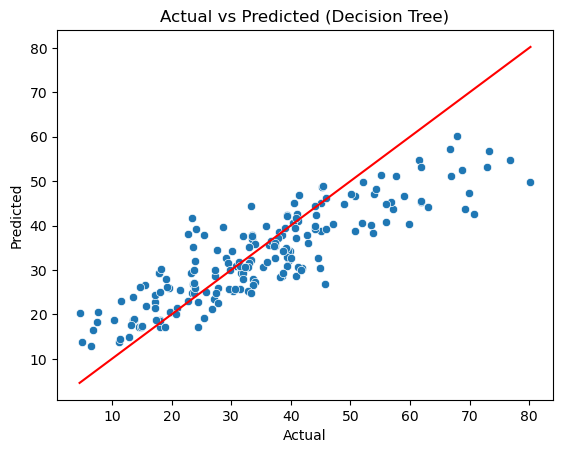

In [88]:
sns.scatterplot(x=y_test, y=svr.predict(X_test_scaled))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Decision Tree)')
plt.show()

In [90]:
diff = pd.DataFrame({'Actual': y_test,
             'Predicted': svr.predict(X_test_scaled),
             'Difference': y_test - (svr.predict(X_test_scaled))}).reset_index(drop = True)
diff.head()

,Actual,Predicted,Difference
0,61.86,45.181200,16.678800
1,45.08,45.091147,-0.011147
2,41.89,30.514697,11.375303
3,41.37,46.795382,-5.425382
4,23.89,32.046502,-8.156502


### Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dt = DecisionTreeRegressor()

In [46]:
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [47]:
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - (r2_score(y_test, dt.predict(X_test_scaled)))) * (n - 1) / (n - p - 1)

print(f'Train R2: {dt.score(X_train_scaled, y_train)*100}')
print(f'Test R2: {dt.score(X_test_scaled, y_test)*100}')
print(f'Adj. R2 : {adj_r2*100}')

Train R2: 99.86609451618716
Test R2: 83.03722960590635
Adj. R2 : 82.2874938978801


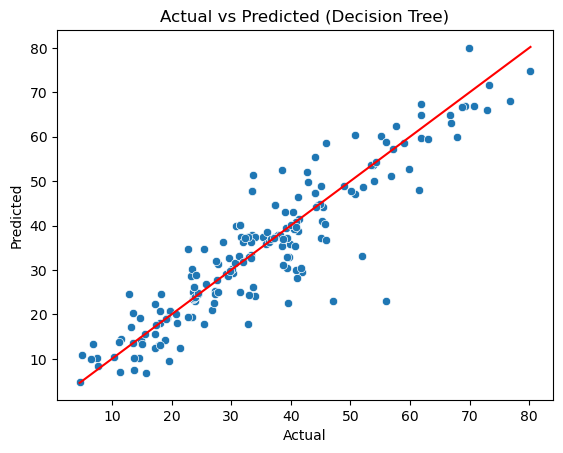

In [48]:
sns.scatterplot(x=y_test, y=dt.predict(X_test_scaled))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Decision Tree)')
plt.show()

In [49]:
diff = pd.DataFrame({'Actual': y_test,
             'Predicted': dt.predict(X_test_scaled),
             'Difference': y_test - (dt.predict(X_test_scaled))}).reset_index(drop = True)
diff.head()

,Actual,Predicted,Difference
0,61.86,59.59,2.27
1,45.08,48.97,-3.89
2,41.89,29.59,12.30
3,41.37,41.37,0.00
4,23.89,22.93,0.96


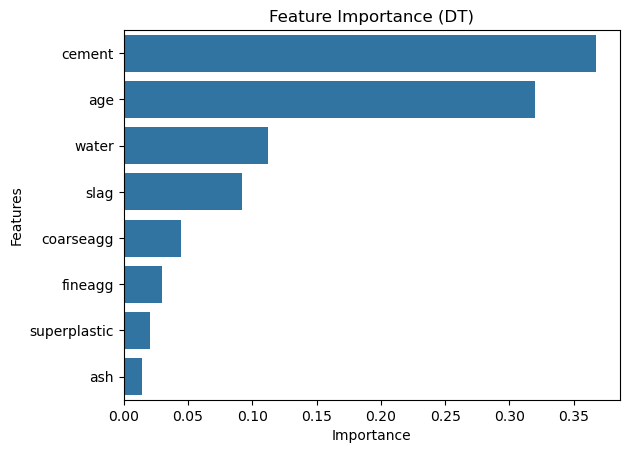

In [50]:
dt_feature_importance = pd.DataFrame({'Features': X.columns,
              'Importance': dt.feature_importances_}).sort_values('Importance', ascending=False)
sns.barplot(dt_feature_importance, x='Importance', y='Features' )
plt.title('Feature Importance (DT)')
plt.show()

### Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf = RandomForestRegressor()

In [54]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [55]:
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - (r2_score(y_test, rf.predict(X_test_scaled)))) * (n - 1) / (n - p - 1)

print(f'Train R2: {rf.score(X_train_scaled, y_train)*100}')
print(f'Test R2: {rf.score(X_test_scaled, y_test)*100}')
print(f'Adj. R2 : {adj_r2*100}')

Train R2: 98.44195584087724
Test R2: 89.76188660111514
Adj. R2 : 89.3093733017169


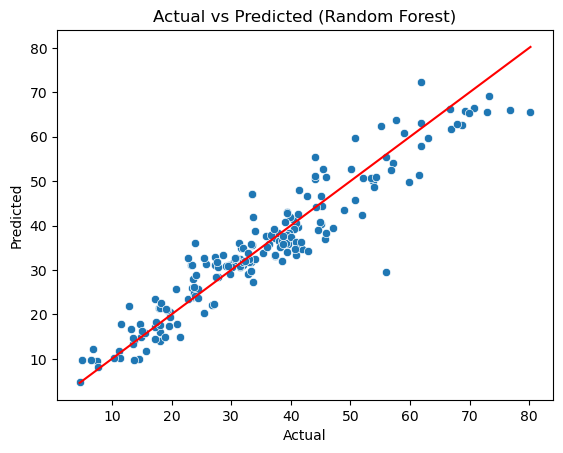

In [56]:
sns.scatterplot(x=y_test, y=rf.predict(X_test_scaled))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Random Forest)')
plt.show()

In [92]:
diff = pd.DataFrame({'Actual': y_test,
             'Predicted': rf.predict(X_test_scaled),
             'Difference': y_test - (rf.predict(X_test_scaled))}).reset_index(drop = True)
diff.head()

,Actual,Predicted,Difference
0,61.86,57.9782,3.8818
1,45.08,46.5773,-1.4973
2,41.89,34.8172,7.0728
3,41.37,47.8936,-6.5236
4,23.89,36.1563,-12.2663


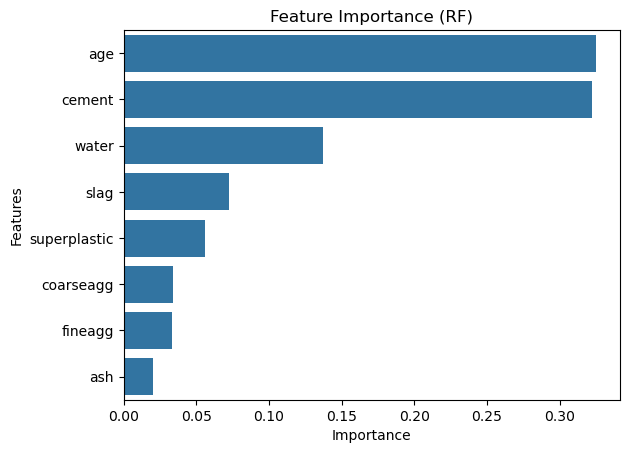

In [58]:
dt_feature_importance = pd.DataFrame({'Features': X.columns,
              'Importance': rf.feature_importances_}).sort_values('Importance', ascending=False)
sns.barplot(dt_feature_importance, x='Importance', y='Features' )
plt.title('Feature Importance (RF)')
plt.show()

### Gradient Boosting Regressor 

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
gb = GradientBoostingRegressor()

In [62]:
gb.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [63]:
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - (r2_score(y_test, gb.predict(X_test_scaled)))) * (n - 1) / (n - p - 1)

print(f'Train R2: {gb.score(X_train_scaled, y_train)*100}')
print(f'Test R2: {gb.score(X_test_scaled, y_test)*100}')
print(f'Adj. R2 : {adj_r2*100}')

Train R2: 95.04183583158144
Test R2: 91.11064609711885
Adj. R2 : 90.717746477102


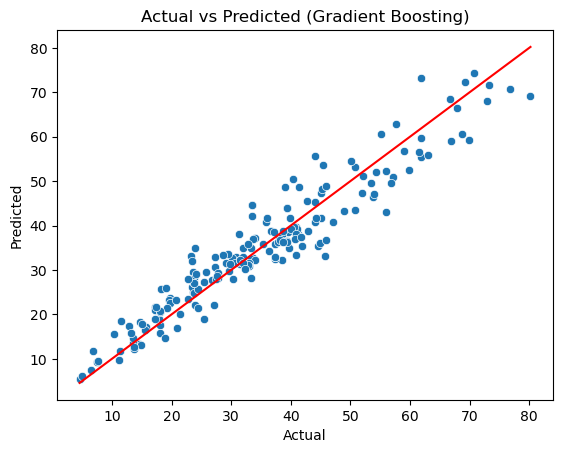

In [64]:
sns.scatterplot(x=y_test, y=gb.predict(X_test_scaled))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Gradient Boosting)')
plt.show()

In [94]:
diff = pd.DataFrame({'Actual': y_test,
             'Predicted': gb.predict(X_test_scaled),
             'Difference': y_test - (gb.predict(X_test_scaled))}).reset_index(drop = True)
diff.head()

,Actual,Predicted,Difference
0,61.86,55.415792,6.444208
1,45.08,47.214596,-2.134596
2,41.89,35.298639,6.591361
3,41.37,48.599943,-7.229943
4,23.89,34.959604,-11.069604


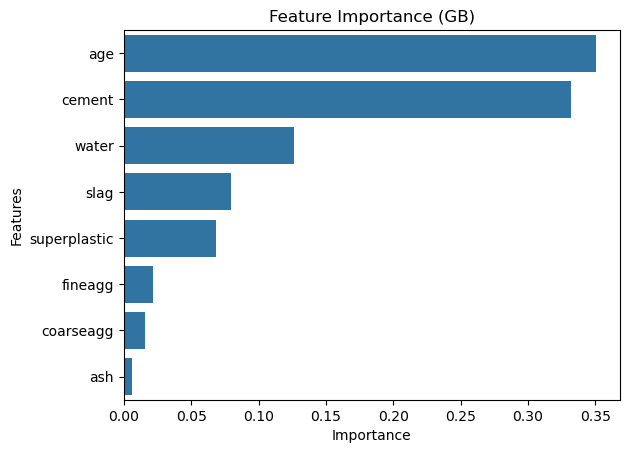

In [66]:
dt_feature_importance = pd.DataFrame({'Features': X.columns,
              'Importance': gb.feature_importances_}).sort_values('Importance', ascending=False)
sns.barplot(dt_feature_importance, x='Importance', y='Features' )
plt.title('Feature Importance (GB)')
plt.show()

### XGB Regressor

In [68]:
from xgboost import XGBRegressor

In [69]:
xgb = XGBRegressor()

In [70]:
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [71]:
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - (r2_score(y_test, xgb.predict(X_test_scaled)))) * (n - 1) / (n - p - 1)

print(f'Train R2: {xgb.score(X_train_scaled, y_train)*100}')
print(f'Test R2: {xgb.score(X_test_scaled, y_test)*100}')
print(f'Adj. R2 : {adj_r2*100}')

Train R2: 99.80552940312803
Test R2: 91.64063647605113
Adj. R2 : 91.27116184515836


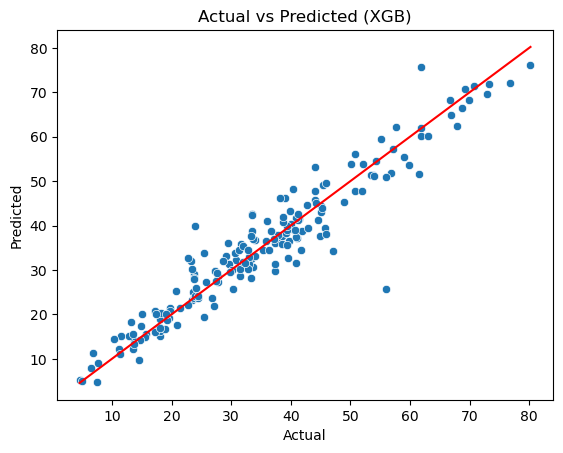

In [72]:
sns.scatterplot(x=y_test, y=xgb.predict(X_test_scaled))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (XGB)')
plt.show()

In [96]:
diff = pd.DataFrame({'Actual': y_test,
             'Predicted': xgb.predict(X_test_scaled),
             'Difference': y_test - (xgb.predict(X_test_scaled))}).reset_index(drop = True)
diff.head()

,Actual,Predicted,Difference
0,61.86,60.210953,1.649047
1,45.08,44.417580,0.662420
2,41.89,38.734154,3.155846
3,41.37,41.442848,-0.072848
4,23.89,39.883224,-15.993224


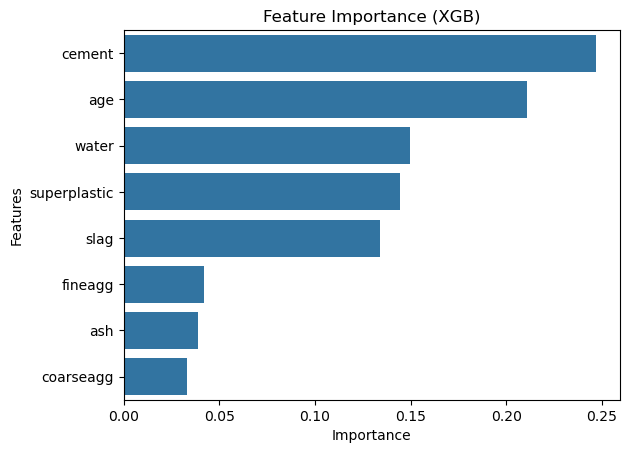

In [74]:
dt_feature_importance = pd.DataFrame({'Features': X.columns,
              'Importance': xgb.feature_importances_}).sort_values('Importance', ascending=False)
sns.barplot(dt_feature_importance, x='Importance', y='Features' )
plt.title('Feature Importance (XGB)')
plt.show()

### Finalizing Model

In [76]:
models = {'Linear Regression': lr,
          'Decision Tree': dt,
          'Random Forest': rf,
          'Gradient Boosting Regressor': gb,
          'XGBoost Regressor': xgb,
          } 

train_r2 = []
test_r2 = []
model_name = []
mae = []
mse = []
rmse = []

for name, model in models.items():
    model_name.append(name)
    train_r2.append(np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')*100))
    test_r2.append(np.mean(cross_val_score(model, X_test_scaled, y_test, cv=5, scoring='r2')*100))
    rmse.append(root_mean_squared_error(y_train, model.predict(X_train_scaled)))
    mae.append(mean_absolute_error(y_train, model.predict(X_train_scaled)))
    mse.append(mean_squared_error(y_train, model.predict(X_train_scaled)))

model_df = pd.DataFrame({'Model': model_name,
             'Train R2': train_r2,
             'Test R2': test_r2,
             'RMSE': rmse,
             'MAE': mae,
             'MSE': mse
             }).sort_values('Test R2', ascending=False).reset_index(drop=True)

model_df.head()

,Model,Train R2,Test R2,RMSE,MAE,MSE
0,Gradient Boosting Regressor,88.531483,82.797208,3.679351,2.776922,13.537624
1,XGBoost Regressor,89.469533,80.334455,0.728682,0.327951,0.530977
2,Random Forest,88.007797,77.981913,2.062532,1.441779,4.254037
3,Linear Regression,74.113747,73.567300,8.292065,6.353937,68.758346
4,Decision Tree,80.147807,60.721681,0.604658,0.067425,0.365612


## Conclusion
After doing cross validation(cv=5), Gradient Boosting Regressor and XGBoost Regressor are the top-performing models for predicting concrete compressive strength in this dataset.